## Presentación
Intentamos predecir el precio del dolar en la Argentina.

##### Datos auxiliares
La cotización al final de cada mes se expresa en:

 - Enero de 1914 - diciembre de 1969: Pesos Moneda Nacional
 - Enero de 1970 - mayo de 1983: Pesos Ley (eliminación de 2 ceros, 1 peso ley = 100 pesos moneda nacional)
 - Junio de 1983 - mayo de 1985: Pesos Argentinos (eliminación de 4 ceros, 1 peso argentino = 10.000 pesos pesos ley)
 - Junio de 1985 - diciembre de 1991: Australes (eliminación de 3 ceros, 1 austral = 1.000 pesos argentinos)
 - Enero de 1992 - enero de 2002: Pesos Convertibles (eliminación de 4 ceros, 1 peso convertible = 10.000 australes)
 - Enero de 2002 - presente: Peso (no hubo eliminación de ceros, solo el fin de la convertibilidad con el dólar estadounidense)

Montamos drive para usar los documentos

In [53]:
# from google.colab import drive
# drive.mount('/gdrive')
# import sys
# sys.path.append('/gdrive/MyDrive/2021/UAI/probabilidad/tp/')
import numpy as np
import pandas as pd
import datetime
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

In [78]:
# Auxiliares
from math import e

def prediccion(model, lista_x):
  return [model.predict([[x]]) for x in lista_x]

short_time = range(datetime.datetime.toordinal(datetime.datetime(1996, 1, 1)), datetime.datetime.toordinal(datetime.datetime(2022, 1, 1)))
long_time = range(datetime.datetime.toordinal(datetime.datetime(1914, 1, 1)), datetime.datetime.toordinal(datetime.datetime(2022, 1, 1)))

def plot(df, time, predictor, value='value'):
  plt.plot(df.ordinal_date, df[value])
  plt.plot(time, prediccion(predictor, time))
  plt.show()

def regla_de_transformacion_short_time(x, y):
  return (x - 1995) * 12 + y

def regla_de_transformacion_short_time_inversa(x):
  return int(x/12) + 1995,  round(x % 12)

def funcion_inversa(x):
  return e**((best_value_to_train - c/x)/a) 

In [65]:
short_time

range(728659, 738156)

## Prueba 1
Datos desde 1995 hasta 10/2021

In [55]:
data = pd.read_csv("./valor_dolar_min.csv", index_col='year') 

In [56]:
transformad_data = {'year_month': [], 'value': [], 'date': [],'ordinal_date': [],'idx': []}
idx = 1
for year, row in list(data.iterrows()):
    for month in range(1, 13):
      value = row[month-1 ]
      if np.isnan(value):
        continue
      transformad_data['year_month'].append(regla_de_transformacion_short_time(year, month))
      transformad_data['value'].append(value)
      transformad_data['date'].append(datetime.datetime(int(year), month, 1))
      transformad_data['ordinal_date'].append(datetime.datetime.toordinal(datetime.datetime(int(year), month, 1)))
      transformad_data['idx'].append(idx)
      idx += 1

In [57]:
df = pd.DataFrame(transformad_data) 
df = df.reset_index()
df['value'].describe()

count    322.000000
mean      12.247946
std       21.925254
min        0.997400
25%        1.005425
50%        3.470500
75%        8.699375
max       99.130000
Name: value, dtype: float64

In [58]:
reg = LinearRegression().fit(df.ordinal_date.values.reshape(-1, 1), df.value)
reg.score(df.ordinal_date.values.reshape(-1, 1), df.value)

0.45466002657289994

322 9497


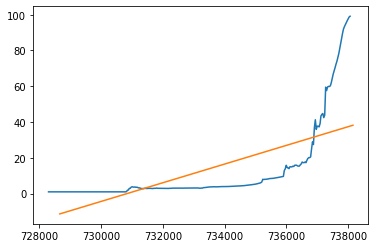

In [77]:
plot(df, short_time, reg)

### Prueba 2
Datos desde 1914 hasta 10/2021

In [33]:
data_completa = pd.read_csv("./valor_dolar.csv", index_col='year') 
coeficiente_meses = pd.read_csv("./coeficiente_meses.csv", index_col='year') 

In [49]:
transformad_data2 = {'year_month': [], 'value': [], 'date': [],'ordinal_date': [], 'coef': [],'real_value': [],}
for year, row in list(data_completa.iterrows()):
    for month in range(1, 13):
      value = row[month-1 ]
      coef = coeficiente_meses.loc[year][month-1 ]
      if np.isnan(value):
        continue
      transformad_data2['year_month'].append(f"{int(year)}.{month}")
      transformad_data2['value'].append(value)
      transformad_data2['coef'].append(coef)
      transformad_data2['real_value'].append(value / coef)
      transformad_data2['date'].append(datetime.datetime(int(year), month, 1))
      transformad_data2['ordinal_date'].append(datetime.datetime.toordinal(datetime.datetime(int(year), month, 1)))

In [50]:
df2 = pd.DataFrame(transformad_data2) 
df2['value'].describe()

count     1289.00000
mean       950.30062
std       6864.61964
min          0.85500
25%          2.85000
50%          4.24590
75%         42.10000
max      98500.00000
Name: value, dtype: float64

In [51]:
reg2 = LinearRegression().fit(df2[["ordinal_date"]].to_numpy(), df2.real_value)
reg2.score(df2[["ordinal_date"]].to_numpy(), df2.real_value)

0.16465241179371404

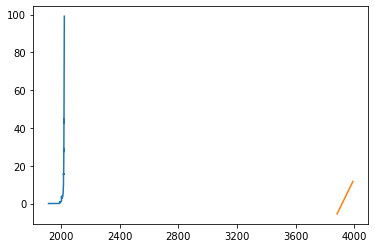

In [52]:
plot(df2, long_time, reg2, value='real_value')

## Prueba 3
Creamos una transformación sobre la función lineal
Datos desde 1912

In [38]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline

df2 = pd.DataFrame(transformad_data2) 
model = make_pipeline(PolynomialFeatures(2), LinearRegression())

reg3 = model.fit(df2[["ordinal_date"]].to_numpy(), df2.real_value)
reg3.score(df2[["ordinal_date"]].to_numpy(), df2.real_value)

0.3634669561939795

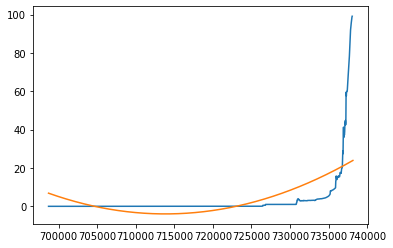

In [79]:
plot(df2, long_time, reg3, value='real_value')

### Prueba 4
Creamos una transformación sobre la función lineal Datos desde 1995

In [40]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline

model = make_pipeline(PolynomialFeatures(2), LinearRegression())

reg4 = model.fit(df[["ordinal_date"]].to_numpy(), df.value)
reg4.score(df[["ordinal_date"]].to_numpy(), df.value)

0.7688111042398864

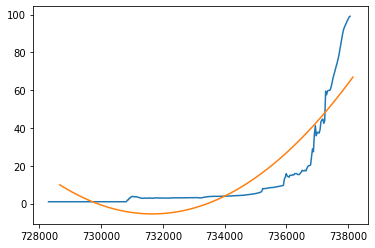

In [80]:
plot(df, short_time, reg4)

### Prueba 5
https://www.geogebra.org/calculator/htgktn7t
 - Aplicamos una transformación logaritmica sobre la función lineal
 - Creamos función recursiva para buscar el mejor valor de variables logaritmicas
 Datos desde 1995

In [42]:
import numpy as np

df = pd.DataFrame(transformad_data) 
df = df.reset_index()

step = 0.001
init_value = 11.2

Y = df['value']

best_score = 0 
epochs = 1000
c = 1
a = 2

value_to_train = init_value
best_value_to_train = value_to_train
scores = []
for _ in range(epochs):
  X = c / (value_to_train - (a * np.log(df.year_month.values.reshape(-1,1))))
  reg = LinearRegression().fit(X, Y)
  score = reg.score(X, df.value)
  if best_score < score:
    best_score = score
    best_value_to_train = value_to_train
  value_to_train += step 
  scores.append(score)

X = c / (best_value_to_train - (a * np.log(df.year_month.values.reshape(-1,1))))
best_model = LinearRegression().fit(X, Y)
score = best_model.score(X, df.value)
print(best_value_to_train, score)

11.651999999999749 0.9519291873182358


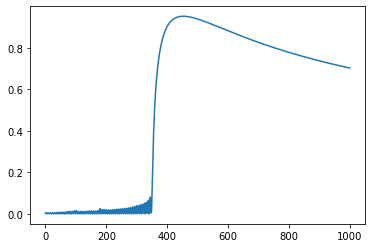

In [43]:
plt.plot(range(len(scores)), scores)
plt.show()

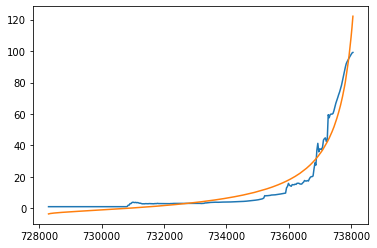

In [44]:
plt.plot(df.ordinal_date, Y)
plt.plot(df.ordinal_date, [best_model.predict([x]) for x in X])
plt.show()

In [45]:
test_value = X[-2]
predicted_value = best_model.predict([test_value])
_date = regla_de_transformacion_short_time_inversa(funcion_inversa(test_value[0]))
print(f'{_date[1]}/{_date[0]} - {predicted_value[0]}')

9/2021 - 114.91982279504552


In [46]:
test_value2 = c / (best_value_to_train - (a * np.log(regla_de_transformacion_short_time(2021,12))))
predicted_value = best_model.predict([[test_value2]])
_date = regla_de_transformacion_short_time_inversa(funcion_inversa(test_value2))
print(f'{_date[1]}/{_date[0]} - {predicted_value[0]}')

12/2021 - 139.5122151830658


In [47]:
test_value2 = c / (best_value_to_train - (a * np.log(regla_de_transformacion_short_time(2022,1))))
predicted_value = best_model.predict([[test_value2]])
_date = regla_de_transformacion_short_time_inversa(funcion_inversa(test_value2))
print(f'{_date[1]}/{_date[0]} - {predicted_value[0]}')

1/2022 - 150.05132579174673
